# Search

## ✅ Linear Search

> 앞에서부터 차례대로 뒤지면서 찾는다

- time complexity : N
- applicable to any list

In [2]:
def linear_search_while(L: list, value) -> int:
    i = 0
    while i < len(L) and L[i] != value:
        i += 1
    if i == len(L):
        return -1
    else:
        return i

In [3]:
# with sentinel
def linear_search_while2(L: list, value) -> int:
    L.append(value)
    i = 0
    while L[i] != value:
        i += 1
    L.pop()
    if i == len(L):
        return -1
    else:
        return i

In [4]:
# for loop
def linear_search_while3(L: list, value) -> int:
    for i in range(len(L)):
        if L[i] == value:
            return i
    return -1

In [8]:
# test code
L = [3, 4, 5, 1, 8, 2]

print(linear_search_while(L, 2))
print(linear_search_while2(L, 2))
print(linear_search_while3(L, 2))

print(linear_search_while(L, 10))
print(linear_search_while2(L, 10))
print(linear_search_while3(L, 10))

5
5
5
-1
-1
-1


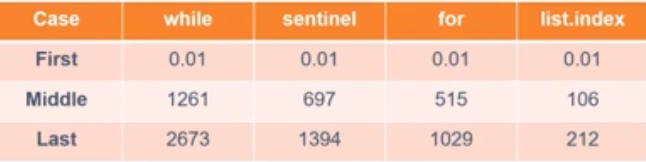

## ✅ Binary Search

> (sorting되어있다고 가정하고) 가운데 값과 비교해가면서 한 쪽 half를 선택하는 걸 반복

- time complexity : log2(len(L))

In [19]:
def binary_search(L: list, v) -> int:
    start, end = 0, len(L)-1
    while start != end + 1:
        mid = (start + end)//2
        if L[mid] < v:
            start = mid + 1
        else:
            end = mid - 1
    if start < len(L) and L[start] == v:
        return start
    else:
        return-1

In [72]:
# recursion
def binary_search_recursion(L: list, v) -> int:
    return binary_recursion(L, v)
    
def binary_recursion(L: list, v):
    start, end = 0, len(L)-1

    if start <= end: # L에 한개이상 있을 때
        
        mid = (start + end)//2

        if L[mid] < v:
            start = mid + 1
        else:
            end = mid - 1

        if start < len(L) and L[start] == v:
            return start
        else:
            return binary_recursion(L[start:end+1], v)
    
    else:
        return -1

In [73]:
# test code
L2 = [3, 4, 5, 1, 8, 2]
L2 = sorted(L2)

print(binary_search(L2, 2))
print(binary_search_recursion(L2, 2))

print(binary_search(L2, 10))
print(binary_search_recursion(L2, 10))

1
1
-1
-1


# Sort

## ✅ Selection Sort

> find the minimum value of the unsorted list and swap it with the leftmost entry
- time complexity : N^2

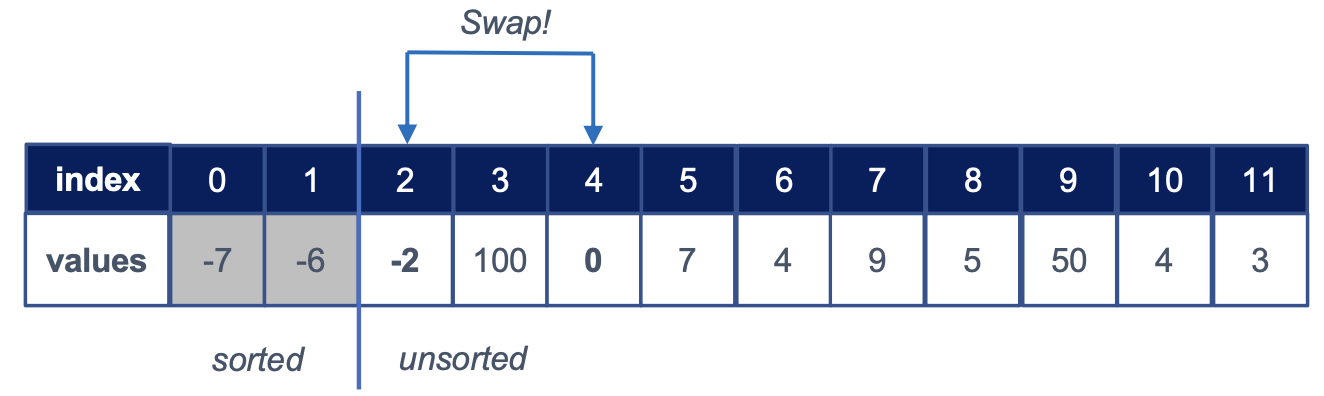



In [77]:
def selection_sort(L: list) -> None:
    for i in range(len(L)):
        smallest = i
        for j in range(i+1, len(L)):
            if L[j] < L[smallest]:
                smallest = j
        L[i], L[smallest] = L[smallest], L[i]
        
    print(L)

In [78]:
# test code
L_sort = [3, 4, 5, 1, 8, 2]

selection_sort(L_sort)

[1, 2, 3, 4, 5, 8]


## ✅ Insertion Sort

Insert the leftmost item of the unsorted list to the proper location of the sorted list



- time complexity: N^2
- At i-th iteration, its inner loop needs to loop up (i+1)/2 items and swap i/2 times on average.
- Look up: 1 + 1.5 + 2 + 2.5 + ... + (N-1)/2 + N/2 = N(N+1)/4 - 1/2
- Swap: 0.5 + 1 + 1.5 + ... + (N-1)/2 = (N-1)N/4

A bit slower than Selection sort
- find_min() needs to look up the whole list
- insert() needs to look up only half on average but also need to swap

when a list is almost sorted, insertion sort needs to look up only kN items

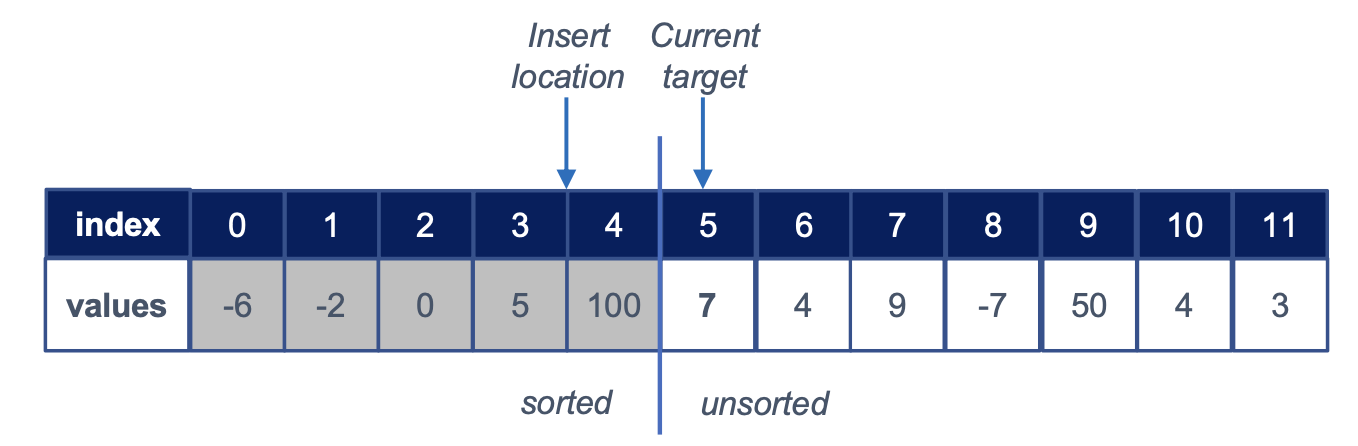

In [83]:
def insertion_sort(L: list) -> None:
    for i in range(1, len(L)):
        for j in range(i, 0, -1):
            if L[j-1] > L[j]:
                L[j-1], L[j] = L[j], L[j-1]
            else:
                break
    
    print(L)

In [84]:
# test code
L_sort = [3, 4, 5, 1, 8, 2]

insertion_sort(L_sort)

[1, 2, 3, 4, 5, 8]


## ✅ Quick Sort

(컴기 범위 밖이지만 컴1에는 나옴)

> recursively partitioning the array into two smaller arrays based on a pivot element such that elements less than the pivot are on the left side, and those greater are on the right side.

- time complexity : O(n*log(n))

In [93]:
def quick_sort(L: list):
    if len(L) < 2:
        return L
    else:
        pivot = L[-1]
        left, right, equal = [], [], []
        for num in L:
            if num < pivot:
                left.append(num)
            elif pivot < num:
                right.append(num)
            else:
                equal.append(num)
        left = quick_sort(left)
        right = quick_sort(right)
        
        result = left + equal + right
        return result

In [96]:
# test code
print(quick_sort([2, 7, 6, 1, -5, 5, -1, 9, 3]))

[-5, -1, 1, 2, 3, 5, 6, 7, 9]


## ✅ Merge Sort

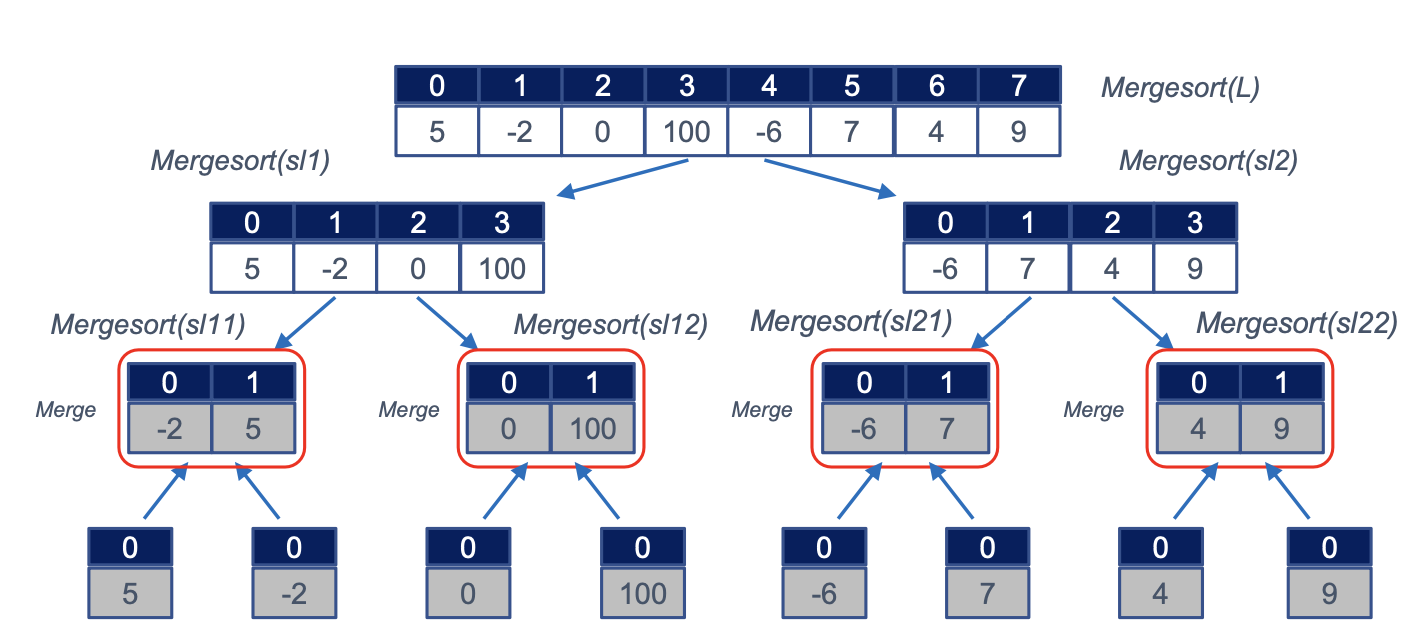

- time complexity :  O(nlog(n)) for both average, worst cases
- memory complexity : N

- step 1 : Divide the whole list into two sub-lists
- step 2 : Sort the left sublist and the right sublist separately
- step 3 : Merge the two sorted sublist in a sorted way

In [104]:
def merge(L:list, first: int, mid: int, last: int):
    k = first
    subL1 = L[first:mid+1]
    subL2 = L[mid+1:last+1]
    i, j = 0, 0
    
    while i < len(subL1) and j < len(subL2):
        if subL1[i] < subL2[j] :
            L[k] = subL1[i]
            i += 1
        else:
            L[k] = subL2[j]
            j += 1
        k += 1
        
    # At least one sublist is finished
    if i < len(subL1) :
        L[k:last+1] = subL1[i:]
    elif j < len(subL2) :
        L[k:last+1] = subL2[j:]
        

def merge_sort_help(L: list, first: int, last: int):
    if first == last: # Base case : 1개짜리면
        return
    else: # Recursive case
        # Step1 : divide it into two sublists
        mid = first + (last - first)  // 2
        # Step2 : sort the two sublists
        merge_sort_help(L, first, mid)
        merge_sort_help(L, mid+1, last)
        # Step3 : merge the two sorted sublists
        merge(L, first, mid, last)

def merge_sort(L:list) -> None:
    merge_sort_help(L, 0, len(L) - 1)

In [108]:
# test code

L = [2, 7, 6, 1, -5, 5, -1, 9, 3]
merge_sort(L)
print(L)

[-5, -1, 1, 2, 3, 5, 6, 7, 9]


# Data Structures

## ✅ Single Linked Lists

- addFirst
- getFirst
- getSize

In [3]:
class LinkedNode():
    def __init__(self, x):
        self.val = x
        self.next = None

In [114]:
class SLList:
    def __init__(self):
        self.first = None
        
    def addFirst(self, x: int) -> None:
        newFirst = LinkedNode(x)
        newFirst.next = self.first
        self.first = newFirst
    
    def getFirst(self) -> int:
        if self.first:
            return self.first.val
        else:
            return None
    
    def getSize(self) -> int:
        curNode = self.first
        size = 0     
        while curNode != None:
            size += 1
            curNode = curNode.next     
        return size
    
        # time complexity : N
    
    def append(self, x: int) -> None:
        curNode = self.first
        if not curNode:
            curNode = LinkedNode(x)
        else:
            while curNode.next:
                curNode = curNode.next
            curNode.next = LinkedNode(x)

In [115]:
## 이때 SLList에 size 변수 있는 경우

class SLList:
    def __init__(self):
        self.first = None
        self.size = 0
        
    def addFirst(self, x: int) -> None:
        newFirst = LinkedNode(x)
        newFirst.next = self.first
        self.first = newFirst
        self.size += 1
    
    def getFirst(self) -> int:
        if self.first:
            return self.first.val
        else:
            return None
    
    def getSize(self) -> int:   
        return self.size
        # time complexity : 1
        
    def append(self, x: int) -> None:
        self.size += 1
        if not self.first:
            self.first = LinkedNode(x)
        else:
            curNode = self.first
            while curNode.next:
                curNode = curNode.next
            curNode.next = LinkedNode(x)

In [120]:
# test code

sList = SLList()
sList.addFirst(1) # current : 1
sList.append(3) # current : 1 3
print(sList.getFirst()) # print : 1
print(sList.getSize()) # print : 2

1
2


## ✅ with sentinel
replace first with sentinel which is a dummy node
when addFirst(), the first node is linked to the sentinel so sentinel.next is the real first node.

In [121]:
class SLList:
    def __init__(self):
        self.sentinel = LinkedNode(4)
        self.size = 0
        
    def addFirst(self, x: int) -> None:
        newFirst = LinkedNode(x)
        newFirst.next = self.sentinel.next
        self.sentinel.next = newFirst
        self.size += 1
    
    def getFirst(self) -> int:
        if self.sentinel.next:
            return self.sentinel.next.val
        else:
            return None
    
    def getSize(self) -> int:   
        return self.size
        # time complexity : 1
        
    def append(self, x: int) -> None:
        self.size += 1
        curNode = self.sentinel
        while curNode.next:
            curNode = curNode.next
        curNode.next = LinkedNode(x)

In [122]:
# test code

sList = SLList()
sList.addFirst(1) # current : 1
sList.append(3) # current : 1 3
print(sList.getFirst()) # print : 1
print(sList.getSize()) # print : 2

1
2


## ✅ Queue

> double Linked List로 구현한 예시. head가 첫번째 노드를, tail이 마지막 노드를 가리킨다

In [17]:
class LinkedNode():
    def __init__(self, x):
        self.val = x
        self.next = None

In [30]:
class Queue():
    def __init__(self):
        self.head = LinkedNode(0)
        self.tail = LinkedNode(-1)
        self.head.next = self.tail
        self.tail.next = self.head

    def enqueue(self, val):
        newNode = LinkedNode(val)
        lastNode = self.tail.next
        lastNode.next = newNode
        newNode.next = self.tail
        self.tail.next = newNode


    def addFirst(self, val):
        newNode = LinkedNode(val)
        firstNode = self.head.next
        self.head.next = newNode
        newNode.next = firstNode
    
    def dequeue(self): # 앞에 걸 제거
        # head - o - tail
        # head - o - o -tail
        firstNode = self.head.next
        if firstNode == self.tail:
            print("Nothing to dequeue")
            return
        if self.tail.next == firstNode:
            self.tail.next = self.head
        self.head.next = firstNode.next
        

    def status_check(self):
        q = []
        curNode = self.head
        while curNode.next != self.tail:
            curNode = curNode.next
            q.append(curNode.val)
        print(f"Values in the Queue: {q}")

In [32]:
s = Queue()
s.status_check()
s.enqueue(5)
s.enqueue(7)
s.enqueue(10)
s.addFirst(3)
s.status_check()
s.dequeue()
s.status_check()
s.enqueue(10)
s.status_check()

Values in the Queue: []
Values in the Queue: [3, 5, 7, 10]
Values in the Queue: [5, 7, 10]
Values in the Queue: [5, 7, 10, 10]


## ✅ Stack

> Single Linked List로 구현한 예시 : sentinel이 topNode(Last In)를 가리킨다

In [4]:
class LinkedNode():
    def __init__(self, x):
        self.val = x
        self.next = None

In [22]:
class Stack():
    def __init__(self):
        self.sentinel = LinkedNode(-1)
        self.size = 0
    
    def push(self, x):
        newNode = LinkedNode(x)
        topNode = self.sentinel.next
        self.sentinel.next = newNode
        newNode.next = topNode
        self.size += 1

    def pop(self):
        topNode = self.sentinel.next
        if topNode == None: 
            print("nothing to pop!")
            return
        self.sentinel.next = topNode.next
        self.size -= 1
        # del?

    def top(self):
        topNode = self.sentinel.next
        if topNode == None: 
            print("nothing in stack!")
            return
        return topNode.val
    
    def getSize(self):
        return self.size

    def isEmpty(self):
        if self.sentinel.next == None:
            return True
        return False

    def clear(self):
        self.sentinel.next = None
        self.size = 0
    
    def status_check(self):
        print(f"IsEmpty: {self.isEmpty()} | Size: {self.getSize()} | Top: {self.top()}")

In [23]:
s = Stack()
s.push(5)
s.push(7)
s.push(10)
s.status_check()
s.pop()
s.status_check()
s.clear()
s.status_check()
s.push(10)
s.status_check()

IsEmpty: False | Size: 3 | Top: 10
IsEmpty: False | Size: 2 | Top: 7
nothing in stack!
IsEmpty: True | Size: 2 | Top: None
IsEmpty: False | Size: 3 | Top: 10


## ✅ Binary Search Trees

In [164]:
class TreeNode():
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [154]:
class BST():
    def __init__(self, root: TreeNode):
        self.root = root
    
    def __searchHelp(self, curNode: TreeNode, x: int) -> TreeNode:
        if not curNode:
            return None
        if x == curNode.val:
            return curNode
        elif x < curNode.val:
            return self.__searchHelp(curNode.left, x)
        else:
            return self.__searchHelp(curNode.right, x)
        
    def search(self, x: int) -> TreeNode:
        return self.__searchHelp(self.root, x)
    
    def __insertHelp(self, curNode: TreeNode, x: int) -> TreeNode:
        if not curNode:
            return TreeNode(x)
        if x < curNode.val:
            curNode.left = self.__insertHelp(curNode.left, x)
        elif x > curNode.val:
            curNode.right = self.__insertHelp(curNode.right, x)
        return curNode
    
    def insert(self, x: int):
        self.root = self.__insertHelp(self.root, x)

    # Given a binary search tree and a key, this function deletes the key and returns the new root
    def __deleteHelp(self, root: TreeNode, val: int):
        # Base case
        if root is None:
            return root

        # If the key to be deleted is smaller than the root's key, then it lies in the left subtree
        if val < root.val:
            root.left = self.__deleteHelp(root.left, val)
        # If the key to be deleted is greater than the root's key, then it lies in the right subtree
        elif val > root.val:
            root.right = self.__deleteHelp(root.right, val)
        # If key is same as root's key, then this is the node to be deleted
        else:
            # Node with only one child or no child
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left

            # Node with two children: Get the inorder successor (smallest in the right subtree)
            root.val = self.minValue(root.right)

            # Delete the inorder successor
            root.right = self.__deleteHelp(root.right, root.val)

        return root
    
    def delete(self, val: int):
        self.__deleteHelp(self.root, val)

    def minValue(self, root: TreeNode):
        minv = root.val
        while root.left:
            minv = root.left.val
            root = root.left
        return minv

In [157]:
# test code : create BST
node_1 = TreeNode(1)
node_3 = TreeNode(3)
node_4 = TreeNode(4)
node_6 = TreeNode(6)
node_7 = TreeNode(7)
node_8 = TreeNode(8)
node_10 = TreeNode(10)
node_13 = TreeNode(13)
node_14 = TreeNode(14)

node_8.left = node_3
node_8.right = node_10
node_3.left = node_1
node_3.right = node_6
node_6.left = node_4
node_6.right = node_7
node_10.right = node_14
node_14.left = node_13

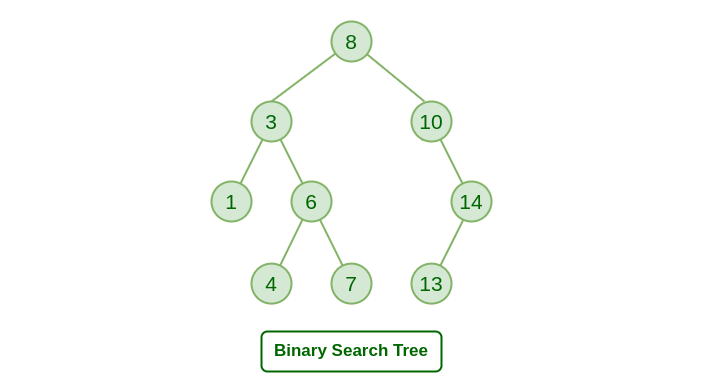

In [158]:
tree = BST(node_8)
# test : search 13
print(tree.search(13))
# test : search 15 (no exist)
print(tree.search(15))
# test : add 15
tree.insert(15)
# test : search 15 (exist)
print(tree.search(15))
# test: delete 7 (delete leaf)
tree.delete(7)
# test: search 7 (no exist)
print(tree.search(7))
# test: add 7
tree.insert(7)
# test : delete 6
tree.delete(6)
# test: search 6 (no exist)
print(tree.search(6))

None
None
None


# Tree

In [2]:
# k-ary tree
# class TreeNode():
#     def __init__(self, x: int, k: int) -> None:
#         self.val = x
#         self.arity = k
#         self.child = [None]*k

# binary tree
class TreeNode():
    def __init__(self, x: int) -> None:
        self.val = x
        self.child = [None] * 2

## ✅ BFT
(Lecture 17)

visit nodes from left to right, and from top to bottom

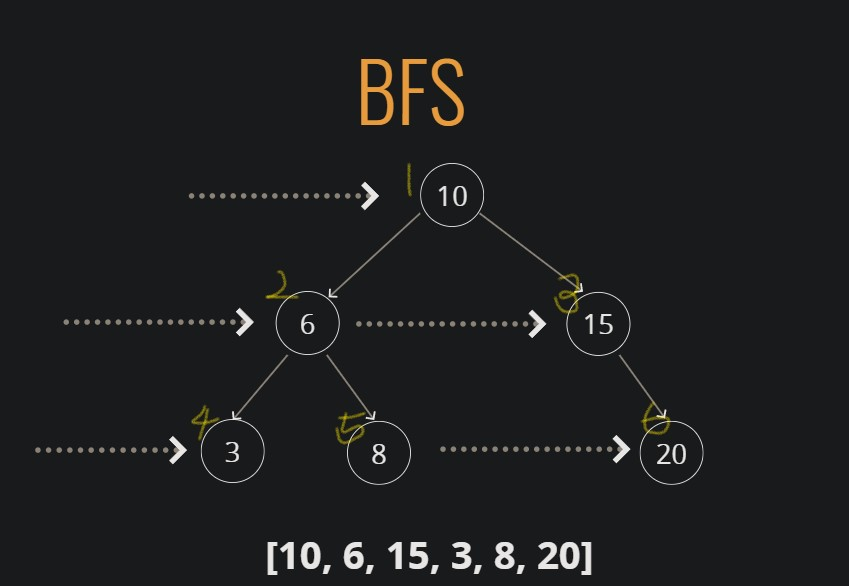

In [13]:
from collections import deque

class Tree():
    def __init__(self, root: TreeNode):
        self.root = root
    
    def visit(self, node: TreeNode):
        print(node.val)
    
    def BFT(self):
        if self.root == None:
            return
        q = [self.root]
        while q:
            curNode = q.pop(0)
            self.visit(curNode)
            for childNode in curNode.child:
                if childNode:
                    q.append(childNode)
        
    def BFT_deque(self):
        if self.root == None:
            return
        q = deque([self.root])
        while q:
            curNode = q.popleft()
            self.visit(curNode)
            for childNode in curNode.child:
                if childNode:
                    q.append(childNode)     
    

In [14]:
# test code : create Tree

node_10 = TreeNode(10)
node_6 = TreeNode(6)
node_15 = TreeNode(15)
node_3 = TreeNode(3)
node_8 = TreeNode(8)
node_20 = TreeNode(20)

node_10.child[0] = node_6
node_10.child[1] = node_15
node_6.child[0] = node_3
node_6.child[1] = node_8
node_15.child[1] = node_20

tree = Tree(node_10)

tree.BFT()

10
6
15
3
8
20


## ✅ DFT
(Lecture 17)

#### Preorder
visit a node before traversing its children from left to right

recursion

활용: directory listing

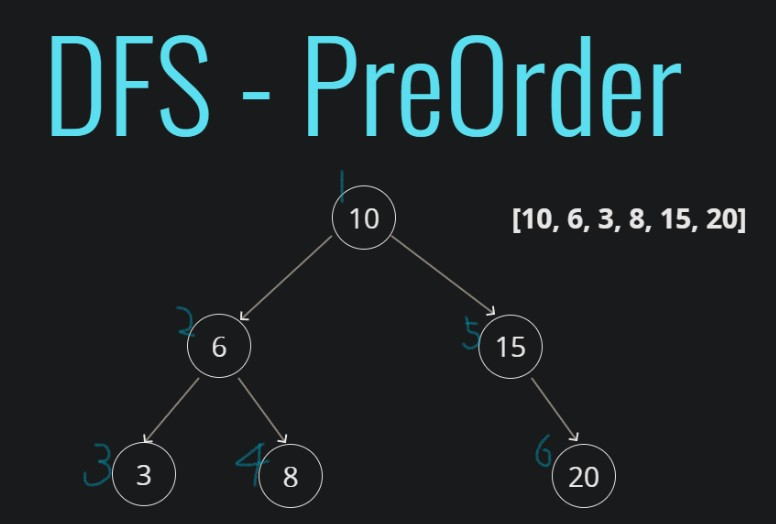

#### Inorder
visit a node before traversing its children from left to right

recursion

활용: convert a binary search tree to a sorted list

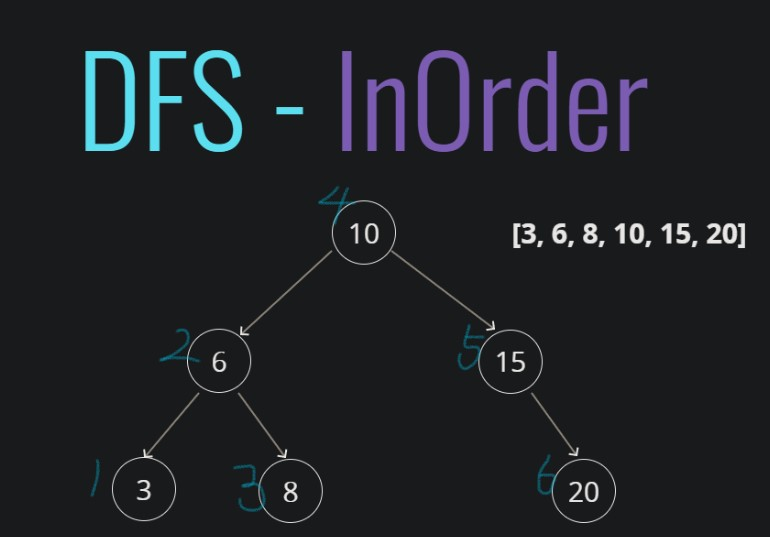

#### Postorder
visit a node after traversing its children from left to right

recursion

활용: file size calculation

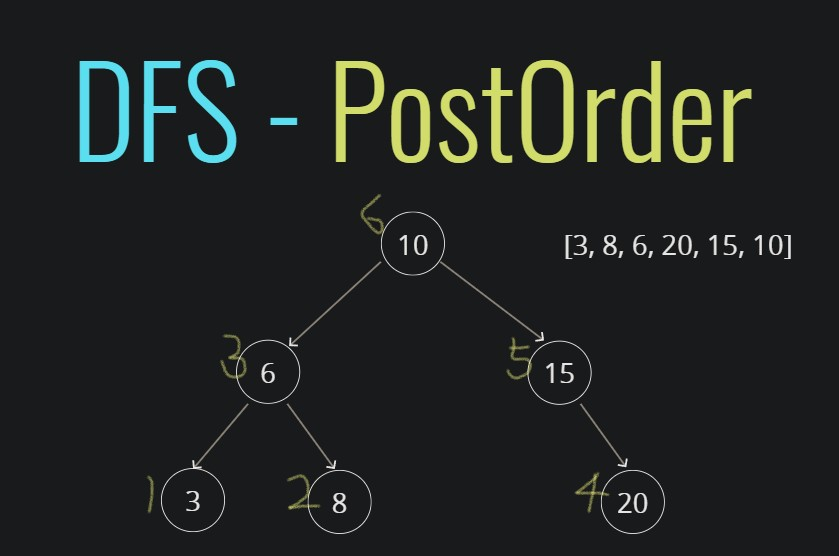

In [9]:
class Tree():
    def __init__(self, root: TreeNode):
        self.root = root
    
    def visit(self, node: TreeNode):
        print(node.val)
        
    def __DFT_preorderHelp(self, curNode: TreeNode):
        if curNode == None:
            return
        self.visit(curNode)
        for childNode in curNode.child:
            self.__DFT_preorderHelp(childNode)
    
    def DFT_preorder(self):
        self.__DFT_preorderHelp(self.root)


    def __DFT_inorderHelp(self, curNode: TreeNode):
        if curNode == None:
            return
        for i in range(len(curNode.child)):
            if i == 1:
                self.visit(curNode)
            self.__DFT_inorderHelp(curNode.child[i])
 
    def DFT_inorder(self):
        self.__DFT_inorderHelp(self.root)

    def __DFT_postorderHelp(self, curNode: TreeNode):
        if curNode == None:
            return
        for i in range(len(curNode.child)):   
            self.__DFT_postorderHelp(curNode.child[i])
        self.visit(curNode)
    
    def DFT_postorder(self):
        self.__DFT_postorderHelp(self.root)

In [10]:
# test code : create Tree

node_10 = TreeNode(10)
node_6 = TreeNode(6)
node_15 = TreeNode(15)
node_3 = TreeNode(3)
node_8 = TreeNode(8)
node_20 = TreeNode(20)

node_10.child[0] = node_6
node_10.child[1] = node_15
node_6.child[0] = node_3
node_6.child[1] = node_8
node_15.child[1] = node_20

tree = Tree(node_10)

print("preorder")
tree.DFT_preorder()
print("inorder")
tree.DFT_inorder()
print("postorder")
tree.DFT_postorder()

preorder
10
6
3
8
15
20
inorder
3
6
8
10
15
20
postorder
3
8
6
20
15
10


# Graph

## ✅ BFT

In [64]:
from collections import deque

class undi_graph():
    def __init__(self, V: list, E:list) -> None :
        self.V = V[:]
        self.neighbors = {}

        for v in V:
            self.neighbors[v] = []

        for(v,w) in E:
            self.neighbors[v].append(w)
            self.neighbors[w].append(v)
    
    # code 1
    def BFT(self):
        if self.V: 
            visited = {}

            for v in self.V:
                visited[v] = False
                
            for v in self.V:
                if visited[v] == False:
                    q = deque([v])
                    while q:
                        curNode = q.popleft()
                        if not visited[curNode]:
                            visited[curNode] = True
                            print(f"visited nodes : {curNode}")
                        for neighbor_node in self.neighbors[curNode]:
                            if not visited[neighbor_node]:
                                q.append(neighbor_node)
                                
    # code 2  : queue 이용한 다른 구현                     
    def traverse(self):
        queue = self.V
        print(queue)
        history = []
        node = queue[0]
        print(node)
        print("####")
        history.append(node)
        while node != None:
            print("node: ", node)
            if node in history:
                queue.pop(0)
                if len(queue) == 0:
                    break
                node = queue[0]
                continue
            else:
                history.append(node)
                queue.pop(0)
                for n in self.neighbors[node]:
                    queue.insert(0, n)
                if len(queue) == 0:
                    break
                node = queue[0]
        print(history)
    

In [65]:
V = [0,1,2,3,4,5,6,7,8,9]
E = [(0,1),(1,4),(1,5),(2,3),(4,6),(5,6),(5,7),(6,9),(7,8)]

graph = undi_graph(V,E)
print("code 1")
graph.BFT()
print("code 2")
graph.traverse()

code 1
visited nodes : 0
visited nodes : 1
visited nodes : 4
visited nodes : 5
visited nodes : 6
visited nodes : 7
visited nodes : 9
visited nodes : 8
visited nodes : 2
visited nodes : 3
code 2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
####
node:  0
node:  1
node:  5
node:  7
node:  8
node:  7
node:  5
node:  6
node:  9
node:  6
node:  5
node:  4
node:  6
node:  1
node:  1
node:  4
node:  0
node:  2
node:  3
node:  2
node:  3
node:  4
node:  5
node:  6
node:  7
node:  8
node:  9
[0, 1, 5, 7, 8, 6, 9, 4, 2, 3]


## ✅ DFT

In [61]:
class undi_graph():
    def __init__(self, V: list, E: list) -> None:
        self.V = V[:]
        self.neighbour = {} # 각 node에 대해 its neighbours를 value로 저장
        
        for v in V:
            self.neighbour[v] = []
            
        for (v, w) in E:
            self.neighbour[v].append(w)
            self.neighbour[w].append(v)
        
    def __DFTHelp_preorder(self, visited: list, v: int) -> None:
        if not visited[v]:
            visited[v] = True
            print(v) #
            for w in self.neighbour[v]:
                self.__DFTHelp_preorder(visited, w)

    def __DFTHelp_postorder(self, visited: list, v: int) -> None: 
        if not visited[v]:
            visited[v] = True
            for w in self.neighbour[v]:
                if visited[w] == False:
                    self.__DFTHelp_postorder(visited, w)
            print(v) #
        


    
    def DFT(self) -> None:
        if self.V:
            print("---------preorder --------")
            visited = {} # visited : 모든 node와 its 방문여부를 value로 저장

            for v in self.V:
                visited[v] = False
            for v in self.V: # graph의 모든 value에 대해 돌기
                self.__DFTHelp_preorder(visited, v)
            
            print("----------postorder --------")
            visited = {} # visited : 모든 node와 its 방문여부를 value로 저장
            for v in self.V:
                visited[v] = False
            for v in self.V: # graph의 모든 value에 대해 돌기
                self.__DFTHelp_postorder(visited, v)

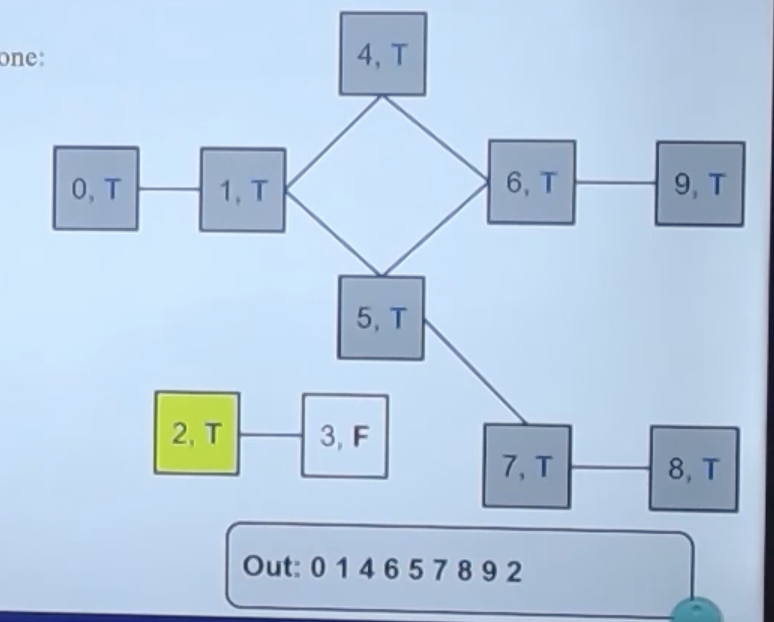

In [62]:
V = list(range(10))
E = [(0,1), (1, 4), (1, 5), (4, 6), (5, 6), (6, 9), (5, 7), (7, 8), (2, 3)]

In [63]:
# test code
graph = undi_graph(V, E)
graph.DFT()

---------preorder --------
0
1
4
6
5
7
8
9
2
3
----------postorder --------
8
7
5
9
6
4
1
0
3
2


## ✅ Cycle

> Implement a method to detect cycles for an undirected graph

In [1]:
class undi_graph3():
    def __init__(self, V: list, E:list) -> None :
        self.V = V[:]
        self.neighbors = {}

        for v in V:
            self.neighbors[v] = []

        for(v,w) in E:
            self.neighbors[v].append(w)
            self.neighbors[w].append(v)

    

    def has_cycles(self):
        if self.V:
            visited = {}
            for v in self.V:
                visited[v] = False
            
            for vertex in self.V:
                if not visited[vertex]:
                    if self.has_cycle_help(vertex, visited, -1):
                        return True
        return False
    
    def has_cycle_help(self, v, visited, parent):
        visited[v] = True

        for neighbor in self.neighbors[v]:
            if not visited[neighbor]:
                if self.has_cycle_help(neighbor, visited, v):
                    return True
            elif neighbor != parent:
                return True
            
        return False

In [2]:
# test code
V = [0,1,2,3,4,5,6,7,8,9]
E = [(0,1),(1,4),(1,5),(2,3),(4,6),(5,6),(5,7),(6,9),(7,8)]

graph = undi_graph3(V,E)
graph.has_cycles()

True

#### Graph 관련 추가로 해볼 만한 것
1. when you want to know if two vertices are connected?
2. when you want to know if all vertices in a graph are conned?
3. when you want to know how many disjoint islands are in a graph?

# ✅ Data Indexed Array 
- time complexity : O(1)

In [104]:
# 예시 코드
class di_array():
    def __init__(self) -> None:
        self.array = [None] * 4294967296
    
    def add(self, x) -> None:
        i = hash_value(x)
        
        if self.array[i] == None:
            self.array[i] = SLList()
        self.array[i].addFirst(x)

# ✅ Hash Table

Using the given `LinkedNode` class implement `HashTable` class

- All data are given in (key, value) form. Key only takes integer values.
- Keep all of your buckets in a list.
- Keep track of the number of elements in the HashTable with a `size` variable.
- Implement `hash_function` using modulus.
- Implement `insert` function that inserts a new (key, value) to hash table. If the key already exists, replace the value.
- Collision is handled using a single linked list with `LinkedNode`.
- Implement `search` function that returns the corresponding value to a given key. Return `None` if it is not found.
- Implement `remove` function that removes the (key, value) from hash table.
- Implement `__len__` function that returns the size of the hash table.

※Optional
When the hash table gets too loaded, rehashing is performed.
- Implement `rehash` function.
- Load of the hash table is calculated as (# of elements in the hash table) / (# of buckets).
- Rehashing is performed when load exceeds 0.8.
- When rehashing, double the original modulus and create a new hash table.


In [1]:
# Run without modification
class LinkedNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

In [2]:
class HashTable:
    def __init__(self, modulo):
        self.modulo = modulo
        self.table = [None for _ in range(self.modulo)]
        self.size = 0

    def hash_fuction(self, key):
        return key % self.modulo
    
    def insert(self, key, value):
        idx = self.hash_fuction(key)

        if self.table[idx] is None:
            self.table[idx] = LinkedNode(key, value)
            self.size += 1

        else:
            curr = self.table[idx]
            while curr:
                if curr.key == key:
                    curr.value = value
                    return
                curr = curr.next
            new_node = LinkedNode(key, value)
            new_node.next = self.table[idx]
            self.table[idx] = new_node
            self.size += 1
        
        if self.size / self.modulo > 0.8:
            self.rehash()

    def search(self,key):
        idx = self.hash_fuction(key)
        curr = self.table[idx]
        while curr:
            if curr.key == key:
                return curr.value
            curr = curr.next
        else: 
            return None

    def remove(self,key):
        idx = self.hash_fuction(key)

        prev = None
        curr = self.table[idx]

        while curr:
            if curr.key == key:
                if prev:
                    prev.next = curr.next

                else:
                    self.table[idx] = curr.next
                self.size -= 1
                return True
            prev = curr
            curr = curr.next
        
        return False
    
    def __len__(self):
        return self.size

    #optional
    def rehash(self):
        print("rehashing!", end = "")
        self.modulo *= 2
        self.size = 0
        self.old_table = self.table
        self.table = [None for _ in range(self.modulo)]
        
        for node in self.old_table:
            while node:
                self.insert(node.key, node.value)
                node = node.next

Implement stack with `myStack` using given `LinkedNode`

In [3]:
# Test code for given cases; run without modification
ht = HashTable(13)
print("Created hash table with modulo = 13\n")

print("Size of hashtable:",len(ht),"/ Expected: 0") 
ht.insert(10, "apple") 
print("Inserted apple with key = 10")
print("Value for key = 10:", ht.search(10),"/ Expected: apple\n")

ht.insert(10,"banana") 
print("Inserted banana with key = 10")
print("Value for key = 10:", ht.search(10), "/ Expected: banana\n")
print("Size of hashtable:",len(ht),"/ Expected: 1") 

ht.insert(23, "pineapple")
print("Inserted pineapple with key = 23")
print("Size of hashtable:",len(ht),"/ Expected: 2") 
ht.remove(23)
print("Removed key = 23")
print("Value for key = 23:", ht.search(23), "/ Expected: None")

Created hash table with modulo = 13

Size of hashtable: 0 / Expected: 0
Inserted apple with key = 10
Value for key = 10: apple / Expected: apple

Inserted banana with key = 10
Value for key = 10: banana / Expected: banana

Size of hashtable: 1 / Expected: 1
Inserted pineapple with key = 23
Size of hashtable: 2 / Expected: 2
Removed key = 23
Value for key = 23: None / Expected: None


In [4]:
# Test code for given cases; run without modification
for i in range(10):
    ht.insert(i, "pear")
print("/ Expected: rehashing!")

rehashing!/ Expected: rehashing!
